In [25]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
import numpy as np
import pandas as pd

In [27]:
data = pd.read_excel('C:/Users/Aravind/Work/PROJECTS/Milky-way-of-Deep-Learning/Milky-way-of-Deep-Learning/data/external/full_dataset.xlsx')

In [28]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
data[['Diet']] = encoder.fit_transform(data[['Diet']])

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3275 entries, 0 to 3274
Columns: 1061 entries, Diet to col1060
dtypes: float64(1061)
memory usage: 26.5 MB


In [30]:
data['Diet'].value_counts()

Diet
0.0    1120
1.0    1094
2.0    1061
Name: count, dtype: int64

In [31]:
X = data.drop(['Diet'] , axis=1)
y = data['Diet']

In [32]:
from sklearn.utils import shuffle
X, y = shuffle(X, y)

In [33]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_pca_reduced = pca.fit_transform(X)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca_reduced, y, test_size=0.2, random_state=42)

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
import lightgbm as lgbm

lgbm_clf = lgbm.LGBMClassifier(n_estimators=100, max_depth=10 , random_state=42)
lgbm_clf.fit(X_train , y_train)
y_pred = lgbm_clf.predict(X_test)

lgbm_acc = accuracy_score(y_test , y_pred)*100
print(f"Accuracy of the model : {lgbm_acc} %")

Accuracy of the model : 32.36641221374046 %


In [36]:
from sklearn.ensemble import AdaBoostClassifier

adb_clf = AdaBoostClassifier(n_estimators=100, random_state=42)
adb_clf.fit(X_train , y_train)
y_pred = adb_clf.predict(X_test)

adb_acc = accuracy_score(y_test , y_pred)*100
print(f"Accuracy of the model : {adb_acc} %")


Accuracy of the model : 33.89312977099237 %


In [37]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgb_clf = HistGradientBoostingClassifier(random_state=42)
hgb_clf.fit(X_train , y_train)
y_pred = hgb_clf.predict(X_test)

hgb_acc = accuracy_score(y_test , y_pred)*100
print(f"Accuracy of the model : {hgb_acc} %")

Accuracy of the model : 31.45038167938931 %


In [38]:
from sklearn.svm import LinearSVC

svm_clf = LinearSVC(C=30 , random_state=42)
svm_clf.fit(X_train , y_train)
y_pred = svm_clf.predict(X_test)

svm_acc = accuracy_score(y_test , y_pred)*100
print(f"Accuracy of the model : {svm_acc} %")

Accuracy of the model : 31.14503816793893 %


In [39]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(C=30 , random_state=42)
log_clf.fit(X_train , y_train)
y_pred = log_clf.predict(X_test)

log_acc = accuracy_score(y_test , y_pred)*100
print(f"Accuracy of the model : {log_acc} %")

Accuracy of the model : 34.19847328244275 %


In [40]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train , y_train)
y_pred = knn_clf.predict(X_test)

knn_acc = accuracy_score(y_test , y_pred)*100
print(f"Accuracy of the model : {knn_acc} %")


Accuracy of the model : 34.35114503816794 %


In [41]:
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()
nb_clf.fit(X_train , y_train)
y_pred = nb_clf.predict(X_test)

nb_acc = accuracy_score(y_test , y_pred)*100
print(f"Accuracy of the model : {nb_acc} %")

Accuracy of the model : 30.839694656488547 %


In [42]:
from sklearn.ensemble import ExtraTreesClassifier

et_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
et_clf.fit(X_train , y_train)
y_pred = et_clf.predict(X_test)

et_acc = accuracy_score(y_test , y_pred)*100
print(f"Accuracy of the model : {et_acc} %")

Accuracy of the model : 30.38167938931298 %


In [43]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100,max_depth=10 , random_state=42)
rf_clf.fit(X_train , y_train)
y_pred = rf_clf.predict(X_test)

rf_acc = accuracy_score(y_test , y_pred)*100
print(f"Accuracy of the model : {rf_acc} %")

Accuracy of the model : 35.41984732824427 %


In [44]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN' , 'Linear SVC' , 'GaussianNB' ,  'LightGBM' , 'AdaBoost' ,  'HistGradientBoosting' , 'ExtraTrees' , 'RandomForest'],
    'Score': [log_acc , knn_acc , svm_acc , nb_acc ,  lgbm_acc , adb_acc , hgb_acc , et_acc , rf_acc]})
models.sort_values(by='Score', ascending=False)

,Model,Score
8,RandomForest,35.419847
1,KNN,34.351145
0,Logistic Regression,34.198473
5,AdaBoost,33.893130
4,LightGBM,32.366412
6,HistGradientBoosting,31.450382
2,Linear SVC,31.145038
3,GaussianNB,30.839695
7,ExtraTrees,30.381679


In [45]:
from sklearn.ensemble import StackingClassifier

stacking_clf = StackingClassifier(
    estimators = [
        ('LightGBM ',lgbm_clf),
        ('HistGradientBoosting', hgb_clf),
        ('AdaBoost' , adb_clf),
        ('RandomForest' , svm_clf)
    ],
    final_estimator = lgbm_clf , cv = 8
)
stacking_clf.fit(X_train , y_train)

StackingClassifier(cv=8,
                   estimators=[('LightGBM ',
                                LGBMClassifier(max_depth=10, random_state=42)),
                               ('HistGradientBoosting',
                                HistGradientBoostingClassifier(random_state=42)),
                               ('AdaBoost',
                                AdaBoostClassifier(n_estimators=100,
                                                   random_state=42)),
                               ('RandomForest',
                                LinearSVC(C=30, random_state=42))],
                   final_estimator=LGBMClassifier(max_depth=10,
                                                  random_state=42))

In [46]:
y_pred = stacking_clf.predict(X_test)
stacking_acc = accuracy_score(y_test , y_pred)*100
print(f"Accuracy of the model : {stacking_acc} %")

Accuracy of the model : 35.11450381679389 %


In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

         0.0       0.35      0.38      0.36       231
         1.0       0.40      0.34      0.37       226
         2.0       0.31      0.33      0.32       198

    accuracy                           0.35       655
   macro avg       0.35      0.35      0.35       655
weighted avg       0.35      0.35      0.35       655



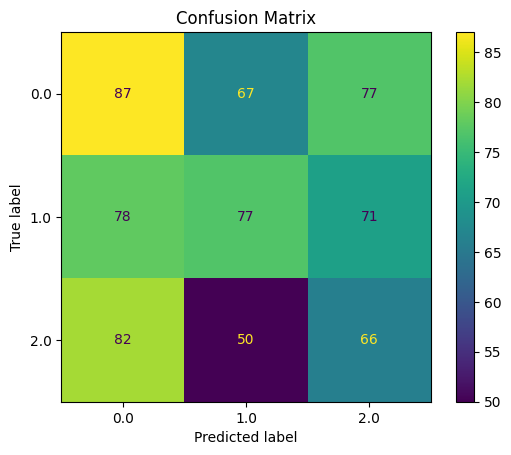

In [48]:
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test , y_pred)
plt.title("Confusion Matrix")
plt.show()

In [49]:
import joblib

joblib.dump(stacking_clf , 'C:/Users/Aravind/Work/PROJECTS/Milky-way-of-Deep-Learning/Milky-way-of-Deep-Learning/models/Diet/model.pkl')

['C:/Users/Aravind/Work/PROJECTS/Milky-way-of-Deep-Learning/Milky-way-of-Deep-Learning/models/Diet/model.pkl']